In [1]:
import os

import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import warnings

# warnings.filterwarnings("ignore")
warnings.filterwarnings(action='once')

import matplotlib.pyplot as plt

%matplotlib inline
# plots
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn
import tensorflow as tf
import tensorflow_addons as tfa
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    classification_report,
    f1_score,
    plot_confusion_matrix,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from tensorflow import keras
# from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.layers import (
    AveragePooling2D,
    AvgPool2D,
    Conv2D,
    Dense,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D,
)
from tensorflow.keras.models import Sequential

# keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import notebook, tqdm

<frozen importlib._bootstrap>:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__


In [2]:
PATH = "/app/_data/"
BATCH_SIZE = 4
SEED = 1488
IMAGE_SIZE = (600, 600)
NUM_CLASSES = 5
INPUT_SHAPE = (600, 600, 3)
IMG_PATH = '/app/_data/train_images/666_bicubic/'

# MODEL_PATH = ""
# SEED = 42
# MODEL_PATH_KAGGLE = ''

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
labels = pd.read_csv(PATH+'train_labels.csv',index_col=[0])

In [4]:
sample_submission = pd.read_csv(PATH + "sample_submission.csv")

In [5]:
labels = labels.join(labels["labels"].str.get_dummies(sep=" "))

In [6]:
labels.head(1)

,image,labels,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
0,800113bb65efe69e.jpg,healthy,0,0,1,0,0,0


In [7]:
# for im1, im2 in duplicates.values:
#     plt.figure(figsize=(10,3))
#     plt.subplot(1,2,1)
#     plt.title(labels[labels['image'] == im1]['labels'].tolist())
#     plt.imshow(Image.open(PATH + "train_images/small_bicubic/"+im1))
#     plt.subplot(1,2,2)
#     plt.title(labels[labels['image'] == im2]['labels'].tolist())
#     plt.imshow(Image.open(PATH + "train_images/small_bicubic/"+im2))
#     plt.show();
# plt.show();

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
feature_columns = labels.columns[2:].tolist()


In [9]:
labels.sample()
feature_columns =  ['complex', 'frog_eye_leaf_spot', 'powdery_mildew', 'rust', 'scab']

,image,labels,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
18009,fcf49e6662c13b20.jpg,rust,0,0,0,0,1,0


In [10]:
train_df, valid_df = train_test_split(
    labels, train_size=0.8, random_state=SEED, stratify=labels["labels"]
)

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# train_df[train_df["powdery_mildew"] == 1].shape[0]

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# for col in feature_columns:
#     print(col, train_df[train_df[col] == 1][col].sum())

In [13]:
# powdery_mildew = (
#     train_df[train_df["powdery_mildew"] == 1]
#     .sample(
#         n=(3000 - train_df[train_df["powdery_mildew"] == 1].shape[0]),
#         replace=True,
#         random_state=SEED,
#     )
# )
# rust = (
#     train_df[train_df["rust"] == 1]
#     .sample(
#         n=(3000 - train_df[train_df["rust"] == 1].shape[0]),
#         replace=True,
#         random_state=SEED,
#     )
# )
# complex_df = (
#     train_df[train_df["complex"] == 1]
#     .sample(
#         n=(3000 - train_df[train_df["complex"] == 1].shape[0]),
#         replace=True,
#         random_state=SEED,
#     )
# )

In [14]:
# train_df_new = pd.concat(
#     [
#         train_df,
#         powdery_mildew,
#         rust,
#         complex_df,
#     ],axis=0,ignore_index=True, 
# )

In [15]:
# train_df_new.shape
# train_df.shape

In [16]:
train_datagen = ImageDataGenerator(
    validation_split=0.2,
#     rescale=1.0 / 255,
#     rotation_range=45,
#     width_shift_range=0.25,
#     height_shift_range=0.25,
#     brightness_range=(0.5, 1.5),
#     shear_range=45,
#     zoom_range=0.25,
#     horizontal_flip=True,
#     vertical_flip=True,
)
train = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory=IMG_PATH,
    x_col="image",
    y_col=feature_columns,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="raw",
    subset="training",
    seed=SEED,
    interpolation="bicubic",
)

Found 14826 validated image filenames.


In [17]:
valid_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
    validation_split=0.2,

)
valid = valid_datagen.flow_from_dataframe(
    dataframe=labels,
    directory=IMG_PATH,
    x_col="image",
    y_col=feature_columns,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="raw",
    subset="validation",
    seed=SEED,
    classes=feature_columns,
    interpolation="bicubic",
    shuffle=False,

)

Found 3706 validated image filenames.


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/dataframe_iterator.py:219: UserWarning: `classes` will be ignored given the class_mode="raw"
  warnings.warn('`classes` will be ignored given the class_mode="{}"'


In [18]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test = test_datagen.flow_from_dataframe(
    dataframe=sample_submission,
    directory=PATH + "test_images/",
    x_col="image",
    y_col=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    seed=SEED,
    shuffle=False,
    interpolation="bicubic",
)

Found 3 validated image filenames.


In [19]:
# feat = next(test)
# plt.figure(figsize=(10, 10))
# for i in range(1, 4):
#     image = feat[i - 1]
#     #     label = target[i - 1]
#     plt.subplot(1, 3, i)
#     plt.imshow(image)
#     #     plt.xlabel(label)
#     plt.xticks([])
#     plt.yticks([])
#     plt.tight_layout()
# plt.show();

In [20]:
# valid._targets

In [21]:
# features, target = next(train)
# plt.figure(figsize=(10, 10))
# for i in range(1, 17):
#     image = features[i - 1]
#     label = target[i - 1]
#     plt.subplot(4, 4, i)
#     plt.imshow(image)
#     plt.xlabel(label)
#     plt.xticks([])
#     plt.yticks([])
#     plt.tight_layout()
# plt.show();

In [22]:
def plot_curves(model, loss=False):
    df = pd.DataFrame(model.history)
    if loss:
        plt.figure(figsize=(12, 6))
        plt.title("loss")
        plt.plot(df.iloc[:, 0], label="loss")
        plt.plot(df.iloc[:, 5], label="val_loss")
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(12, 20))
        plt.subplot(4, 1, 1)
        plt.title("accuracy")
        plt.plot(df.iloc[:, 1], label="accuracy")
        plt.plot(df.iloc[:, 6], label="val_accuracy")
        plt.legend()

        plt.subplot(4, 1, 2)
        plt.title("recall")
        plt.plot(df.iloc[:, 2], label="recall")
        plt.plot(df.iloc[:, 7], label="val_recall")
        plt.legend()

        plt.subplot(4, 1, 3)
        plt.title("precision")
        plt.plot(df.iloc[:, 3], label="precision")
        plt.plot(df.iloc[:, 8], label="val_precision")
        plt.legend()

        plt.subplot(4, 1, 4)
        plt.title("f1")
        plt.plot(df.iloc[:, 4], label="f1")
        plt.plot(df.iloc[:, 9], label="val_f1")
        plt.legend()
        plt.show();

In [23]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        keras.layers.experimental.preprocessing.RandomHeight(0.1),
        keras.layers.experimental.preprocessing.RandomWidth(0.1),
        keras.layers.experimental.preprocessing.RandomRotation(0.15),
        keras.layers.experimental.preprocessing.RandomZoom(0.25, 0.25),
    ]
)

In [24]:
# features, target = next(train)
# plt.figure(figsize=(15,15))
# for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     aug_img = data_augmentation(tf.expand_dims(features[0], axis=0))
#     plt.imshow(aug_img[0].numpy().astype("uint8"))
#     plt.title(i)
#     plt.axis("off")
# plt.show();

In [25]:
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    elif 5 <= epoch < 20:
        return 0.0005
    else:
        return 0.0001

In [26]:
callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss',
            patience=10, restore_best_weights=True, verbose=1),
        keras.callbacks.LearningRateScheduler(schedule = scheduler, verbose=1)
        ]

In [27]:
inputs = keras.Input(shape=INPUT_SHAPE)
x = data_augmentation(inputs)
x = keras.applications.EfficientNetB7(weights="imagenet", include_top=False)(x)
x = keras.layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = keras.layers.Flatten(name="flatten")(x)
outputs = keras.layers.Dense(NUM_CLASSES, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
# backbone = EfficientNetB7(input_shape=INPUT_SHAPE, weights="imagenet", include_top=False)
# model = Sequential()
# model.add(backbone)
# model.add(GlobalAveragePooling2D())
# model.add(Flatten())
# model.add(Dense(units=NUM_CLASSES, activation="sigmoid"))

In [29]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.0005),
    metrics=['acc',
        keras.metrics.Recall(),
        keras.metrics.Precision(),
        tfa.metrics.F1Score(num_classes=NUM_CLASSES, average="micro"),
    ],
)

In [30]:
history = model.fit(
    train,
    validation_data=valid,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    use_multiprocessing=True,
    callbacks = callbacks
)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
Epoch 1/20
3707/3707 [==============================] - 3021s 815ms/step - loss: 0.2020 - acc: 0.5846 - recall: 0.6793 - precision: 0.8045 - f1_score: 0.6661 - val_loss: 0.1094 - val_acc: 0.7339 - val_recall: 0.8342 - val_precision: 0.9212 - val_f1_score: 0.7823

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
Epoch 2/20
3707/3707 [==============================] - 2790s 753ms/step - loss: 0.1470 - acc: 0.6351 - recall: 0.7817 - precision: 0.8549 - f1_score: 0.7138 - val_loss: 0.1157 - val_acc: 0.7102 - val_recall: 0.8502 - val_precision: 0.8970 - val_f1_score: 0.7674

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
Epoch 3/20
3707/3707 [==============================] - 2746s 741ms/step - loss: 0.1352 - acc: 0.6368 - recall: 0.7991 - precision: 0.8586 - f1_score: 0.7189 - val_loss: 0.1287 - val_acc: 0.7234 - val_recall: 0.8160 - v

Process Keras_worker_ForkPoolWorker-20:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 356, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
history_effnet7_1 = pd.DataFrame(history.history)
history_effnet7_1.to_csv("history_effnet7_1.csv")

In [ ]:
model.save("/app/_data/models/effnet7_1_5class.h5")

In [45]:
# import shutil
# shutil.make_archive('base_model_0001_nearest', 'zip','/app/_data/models/base_model_0001/')

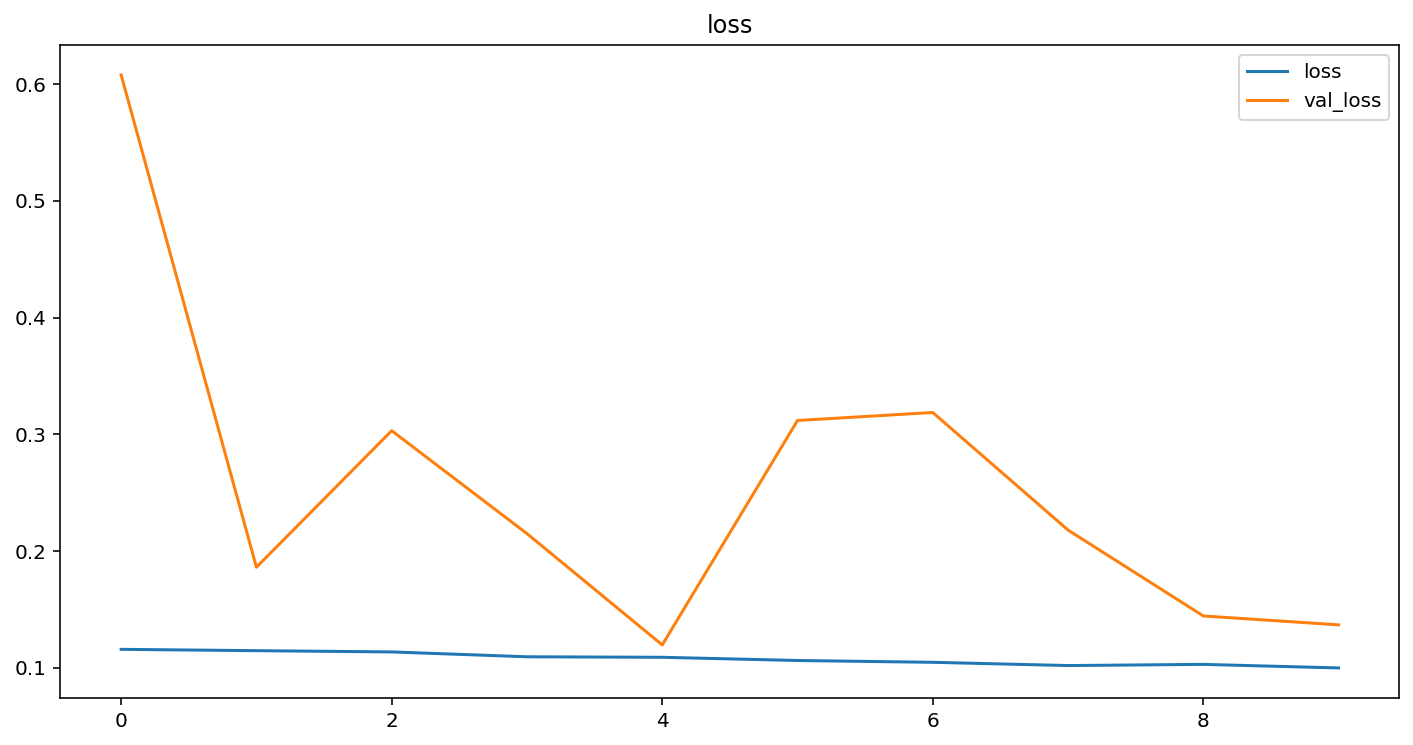

In [48]:
plot_curves(history, loss=True)

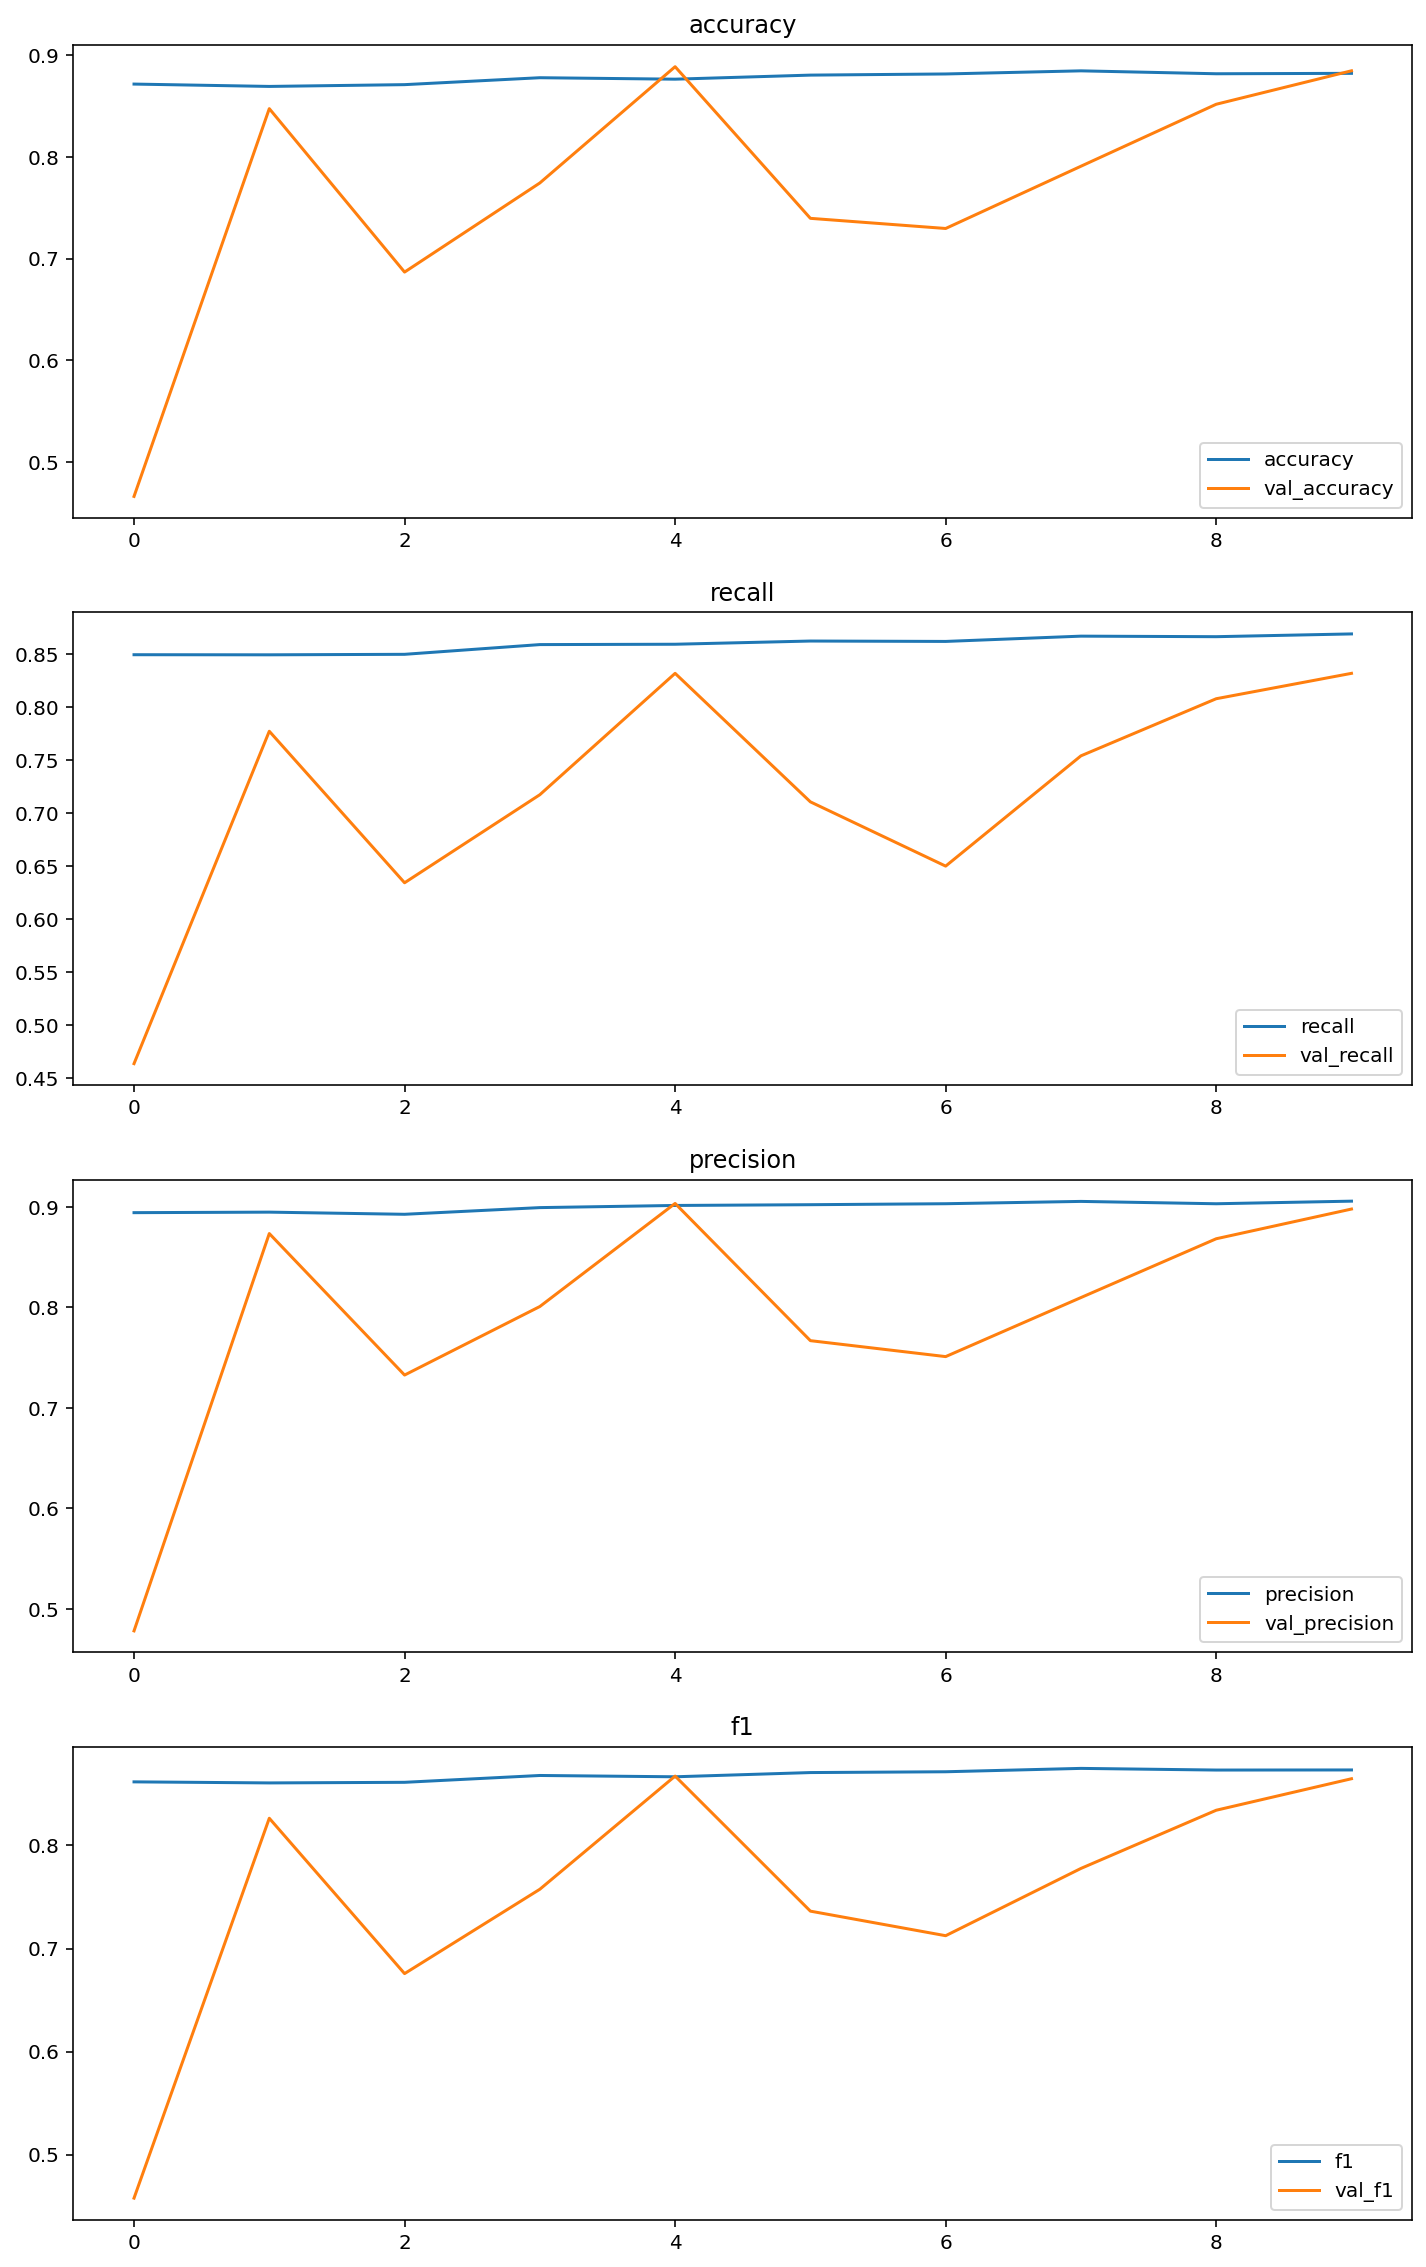

In [49]:
plot_curves(history)

In [32]:
# model.evaluate(valid)

59/59 [==============================] - 8s 136ms/step - loss: 0.3497 - acc: 0.7968 - recall: 0.7617 - precision: 0.8225 - f1_score: 0.7917


[0.3497026562690735,
 0.7968330383300781,
 0.7616763710975647,
 0.822519063949585,
 0.791726291179657]

In [44]:
# def predict_test(threshold = True):
#     sample_submission_copy = sample_submission.copy()

#     if threshold:
#         prediction_valid_results = model.predict(valid)
#         prediction_valid = pd.DataFrame(prediction_valid_results, columns=feature_columns).join(pd.DataFrame(valid._targets, columns=feature_columns), rsuffix='_t')
#         best_thresholds = pd.DataFrame()
#         for col in feature_columns:
#             f1_init = 0
#             for th in np.linspace(0.01, 1, 500):
#                 f1 = metrics.f1_score(prediction_valid[col +'_t'], prediction_valid[col]>th)
#                 if f1>f1_init:
#                     f1_init = f1
#                     best_thresholds.loc['threshold', col] = th
#                     best_thresholds.loc['f1', col] = f1
#         test_prediction = pd.DataFrame(model.predict(test), columns=feature_columns, index = sample_submission.index)
#         for col in feature_columns:
#             sample_submission_copy[col] = test_prediction[col]>best_thresholds.loc['threshold', col]
#             sample_submission_copy[col] = sample_submission_copy[col].replace({True: col, False: ""})
#         sample_submission_copy['labels'] = sample_submission_copy[feature_columns].apply(" ".join, axis=1).str.split().str.join(sep=" ")
#         return sample_submission_copy
# #     , best_thresholds, prediction_valid
#     else:
#         test_prediction = pd.DataFrame(model.predict(test), columns=feature_columns, index = sample_submission.index)
#         for col in feature_columns:
#             sample_submission_copy[col] = test_prediction[col]>0.5
#             sample_submission_copy[col] = sample_submission_copy[col].replace({True: col, False: ""})
#         sample_submission_copy['labels'] = sample_submission_copy[feature_columns].apply(" ".join, axis=1).str.split().str.join(sep=" ")
#         return sample_submission_copy

# sample_submission_copy = predict_test(threshold=True)
# sample_submission_copy[['image', 'labels']].to_csv("submission.csv",index=False)
# sample_submission_copy[['image', 'labels']]